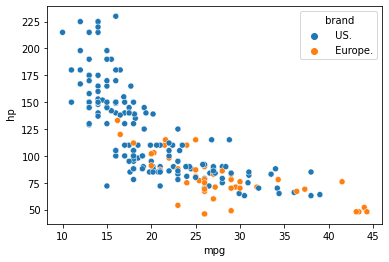

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


cars = pd.read_csv("https://raw.githubusercontent.com/murpi/wilddata/master/cars.csv")

carsUSEU = cars.loc[cars[' brand'].isin([' US.', ' Europe.' ])]

sns.scatterplot(x = 'mpg', y = ' hp', data = carsUSEU, hue = ' brand')


In [ ]:
carsUSEU

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
254,23.5,6,173,110,2725,13,1982,US.
256,17.0,8,305,130,3840,15,1980,US.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.


In [ ]:
carsUSEU.columns

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],
      dtype='object')

In [ ]:
X = carsUSEU[["mpg", ' hp']]
y = carsUSEU[' brand']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
modelKNN = KNeighborsClassifier(140)

modelKNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=140)

In [ ]:
modelKNN.predict([[45, 50]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([' US.'], dtype=object)

In [ ]:
modelKNN.n_neighbors

5

In [ ]:
modelKNN = KNeighborsClassifier(20)

modelKNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
modelKNN.score(X_train, y_train)

0.8343949044585988

In [ ]:
modelKNN.score(X_test, y_test)


0.8301886792452831

In [ ]:
confusion_matrix(y_true = y_test, y_pred = modelKNN.predict(X_test))

array([[ 9,  6],
       [ 3, 35]])

In [ ]:
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = modelKNN.predict(X_test)),
             index = modelKNN.classes_ + " actual",
             columns = modelKNN.classes_ + " predicted")

,Europe. predicted,US. predicted
Europe. actual,9,6
US. actual,3,35


In [ ]:
35+9

44

In [ ]:
44/53

0.8301886792452831

In [ ]:
38/53

0.7169811320754716

In [ ]:
modelKNN = KNeighborsClassifier(20, weights = 'distance')

modelKNN.fit(X_train, y_train)

modelKNN.score(X_test, y_test)

0.7924528301886793

In [ ]:
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = modelKNN.predict(X_test)),
             index = modelKNN.classes_ + " actual",
             columns = modelKNN.classes_ + " predicted")

,Europe. predicted,US. predicted
Europe. actual,7,8
US. actual,3,35


In [ ]:
modelKNN = KNeighborsClassifier(5, weights = 'uniform')

modelKNN.fit(X_train, y_train)

modelKNN.predict([[60, 50]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([' Europe.'], dtype=object)

In [ ]:
modelKNN.kneighbors([[60, 48]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[16.6       , 16.9       , 26.40075756, 26.62705391, 30.29785471]]),
 array([[98, 80, 94, 93, 27]]))

In [ ]:
type(modelKNN.kneighbors([[60, 48]])[0])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


numpy.ndarray

In [ ]:
X_train.iloc[98]

mpg    43.4
 hp    48.0
Name: 106, dtype: float64

In [ ]:
modelKNN = KNeighborsClassifier(5, weights = 'uniform')

modelKNN.fit(X, y)



KNeighborsClassifier()

In [ ]:
modelKNN.predict([[14, 165]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([' US.'], dtype=object)

In [ ]:
modelKNN.kneighbors([[31.9, 71]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[0.        , 1.0198039 , 2.14709106, 2.4       , 2.50798724]]),
 array([[  1, 201, 169,  50,  78]]))

In [ ]:
X

,mpg,hp
0,14.0,165
1,31.9,71
2,17.0,140
3,15.0,150
4,30.5,63
...,...,...
254,23.5,110
256,17.0,130
258,22.0,112
259,18.0,100


In [ ]:
X = carsUSEU[['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year']]
y = carsUSEU[' brand']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
modelKNN = KNeighborsClassifier(5, weights = 'uniform')

modelKNN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = modelKNN.predict(X_test)),
             index = modelKNN.classes_ + " actual",
             columns = modelKNN.classes_ + " predicted")

,Europe. predicted,US. predicted
Europe. actual,7,8
US. actual,3,35


In [ ]:
modelKNN.predict([X_test.loc[42]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([' US.'], dtype=object)

In [ ]:
modelKNN.kneighbors([X_test.loc[42]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[30.90711892, 46.13556112, 72.68596838, 72.76159701, 78.04005382]]),
 array([[ 73,  59,  91,  31, 149]]))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
modelRL = LogisticRegression()

modelRL.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
modelRL.score(X_test, y_test)

0.8301886792452831

In [ ]:
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = modelRL.predict(X_test)),
             index = modelRL.classes_ + " actual",
             columns = modelRL.classes_ + " predicted")

,Europe. predicted,US. predicted
Europe. actual,10,5
US. actual,4,34
